# Coronary Heart Disease (CHD) Prediction Using Machine Learning and Fuzzifiers

### Project Overview
This project was developed as part of a **Decision Support Systems** course to demonstrate the application of machine learning techniques for classification and decision-making. The focus was on predicting the likelihood of **Coronary Heart Disease (CHD)** using a dataset of health-related variables.

### Dataset
The dataset used for training and testing the model was sourced from **Mendeley Data**:  
[Dataset Link](https://data.mendeley.com/datasets/jc3rwftjnf/1)  
This dataset contains critical health indicators such as cholesterol levels, blood pressure, age, and other attributes relevant to predicting CHD outcomes.

### Project Steps

1. **Data Preparation and Cleaning**:
   - Loaded the dataset into a pandas DataFrame.
   - Inspected and preprocessed the data to handle any missing or inconsistent values.

2. **Fuzzyfication**:
   - Converted numerical features (e.g., cholesterol levels, blood pressure, age) into fuzzy membership values using fuzzy membership functions:
     - **Linear**: Ascending and descending functions.
     - **Triangular**: For features with a peak membership.
     - **Trapezoidal**: For features with a range of full membership.
   - This step enabled better handling of gradual transitions and uncertainty in the data.

3. **Feature Engineering**:
   - Generated fuzzy features such as:
     - Cholesterol: Low, Middle, High.
     - HDL, LDL, Blood Pressure (Systolic and Diastolic), and Age categories.
   - These features captured nuanced patterns in the data.

4. **Model Training**:
   - Split the dataset into training (70%) and testing (30%) subsets.
   - Trained a **Decision Tree Classifier** with hyperparameters optimized to prevent overfitting:
     - Maximum depth: 10.
     - Minimum samples to split: 20.
     - Minimum samples per leaf: 10.

5. **Model Evaluation**:
   - Evaluated the trained model using metrics like **accuracy**.
   - Computed and visualized the **confusion matrix** to assess performance across different classes.

6. **Decision Tree Visualization**:
   - Exported the trained decision tree as a graph using `export_graphviz` and visualized it for better interpretability.

### Results
- The decision tree model achieved a satisfactory level of accuracy in predicting CHD based on the given dataset.
- Visualization of the decision tree provided insights into the key features influencing the predictions.

### Conclusion
This project showcases the integration of fuzzy logic, machine learning, and data visualization to solve a real-world problem. The techniques used in this project demonstrate how Decision Support Systems can leverage data-driven insights to aid in critical health-related decision-making.

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Overview

This dataset contains various health-related variables collected to study cardiovascular health and related conditions. The variables include demographic data, health status indicators, and clinical measurements. The dataset is ideal for research on hypertension, dyslipidemia, and coronary heart disease.

## Column Descriptions

- **sex**: Gender of the individual  
- **age**: Age in years  
- **sm_presnt**: Smoking status  
- **pa_mid**: Physical activity level  
- **HE_HPdg**: Hypertension diagnosis  
- **HE_HLdg**: Hyperlipidemia diagnosis  
- **HE_sbp1**: First systolic blood pressure reading  
- **HE_dbp1**: First diastolic blood pressure reading  
- **HE_sbp**: Final systolic blood pressure reading  
- **HE_chol**: Total cholesterol level  
- **HE_HDL_st2**: High-density lipoprotein (HDL) cholesterol level  
- **HE_LDL_drct**: Low-density lipoprotein (LDL) cholesterol level  
- **O_DIP**: Oral glucose tolerance test result  
- **CHD**: Coronary heart disease status  

In [ ]:
excel_data_df = pd.read_excel('CHD_dataset.xlsx')
print(excel_data_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     sex  age  sm_presnt  pa_mid  HE_HPdg  HE_HLdg  HE_sbp1  HE_dbp1  HE_sbp  \
0      1   63          0       0        0        0      150       84     144   
1      1   30          0       0        0        0      122       90     123   
2      1   24          0       0        0        0      120       88     117   
3      2   31          0       0        0        0      110       76     118   
4      2   36          0       0        0        0      134       84     133   
..   ...  ...        ...     ...      ...      ...      ...      ...     ...   
712    1   22          0       1        0        0      104       76     105   
713    2   59          0       1        0        1      124       82     120   
714    1   39          1       1        0        0      112       74     108   
715    1   61          1       1        1        1      120       74   

### Purpose of Fuzzy Membership Functions

#### Purpose:
Implements functions for creating **fuzzy membership values** that define degrees of belonging to fuzzy categories.

#### Key Functions:
- **Linear Ascending/Descending**:
  - Gradually increases or decreases membership values between two defined points.

- **Triangular**:
  - Represents a peak membership of 1 at a defined midpoint, with linear increases and decreases on either side.

- **Trapezoidal**:
  - Includes a flat region where membership remains 1, with linear increases and decreases on the edges.

#### Functionality:
- These functions **convert numeric values** (crisp data) into **fuzzy categories** based on predefined ranges.
- Each function is tailored to map values into specific fuzzy sets (e.g., Low, Middle, High).

This approach ensures input data is transformed into a format suitable for **fuzzy logic reasoning**, enabling systems to handle uncertainty and gradual transitions effectively.


In [ ]:
def linearFunction_Ascending(points, xrange):
    """
    Generates fuzzy membership values for a linear ascending function.

    Parameters:
    - points: A dictionary defining the start ('a') and end ('b') points of the linear increase.
    - xrange: A list or iterable of input values for which the fuzzy membership values will be calculated.

    Returns:
    - values: A list of membership values (ranging from 0 to 1) corresponding to each input in xrange.
    """
    # Initialize an empty list to store membership values
    values = []

    # Loop through each input value in the provided range
    for x in xrange:
        # If the input is below point 'a', the membership is 0 (completely outside the fuzzy set)
        if x < points['a']:
            values.append(0)

        # If the input is between 'a' and 'b', calculate the membership using a linear formula
        elif (x >= points['a'] and x < points['b']):
            # Linear increase: membership is proportional to how far x is from 'a'
            values.append((x - points['a']) / (points['b'] - points['a']))

        # If the input is greater than or equal to 'b', the membership is 1 (completely inside the fuzzy set)
        elif x >= points['b']:
            values.append(1)

    # Return the list of calculated membership values
    return values


def linearFunction_Descending(points, xrange):
    """
    Generates fuzzy membership values for a linear descending function.

    Parameters:
    - points: A dictionary defining the start ('a') and end ('b') points of the linear decrease.
    - xrange: A list or iterable of input values for which the fuzzy membership values will be calculated.

    Returns:
    - values: A list of membership values (ranging from 0 to 1) corresponding to each input in xrange.
    """
    # Initialize an empty list to store membership values
    values = []

    # Loop through each input value in the provided range
    for x in xrange:
        # If the input is below point 'a', the membership is 1 (completely inside the fuzzy set)
        if x < points['a']:
            values.append(1)

        # If the input is between 'a' and 'b', calculate the membership using a linear formula
        elif (x >= points['a'] and x < points['b']):
            # Linear decrease: membership decreases proportionally as x moves from 'a' to 'b'
            values.append((points['b'] - x) / (points['b'] - points['a']))

        # If the input is greater than or equal to 'b', the membership is 0 (completely outside the fuzzy set)
        elif x >= points['b']:
            values.append(0)

    # Return the list of calculated membership values
    return values


def triangleFunction(points, xrange):
    """
    Generates fuzzy membership values for a triangular membership function.

    Parameters:
    - points: A dictionary defining the three key points of the triangle:
        - 'a': The point where the membership begins to increase from 0.
        - 'b': The peak of the triangle where membership is 1.
        - 'c': The point where membership decreases back to 0.
    - xrange: A list or iterable of input values for which the fuzzy membership values will be calculated.

    Returns:
    - values: A list of membership values (ranging from 0 to 1) corresponding to each input in xrange.
    """
    # Initialize an empty list to store membership values
    values = []

    # Loop through each input value in the provided range
    for x in xrange:
        # If the input is less than or equal to 'a', the membership is 0 (completely outside the fuzzy set)
        if x <= points['a']:
            values.append(0)

        # If the input is between 'a' and 'b', calculate the ascending membership using a linear formula
        elif points['a'] <= x <= points['b']:
            # Membership increases linearly from 0 at 'a' to 1 at 'b'
            values.append((x - points['a']) / (points['b'] - points['a']))

        # If the input is between 'b' and 'c', calculate the descending membership using a linear formula
        elif points['b'] <= x <= points['c']:
            # Membership decreases linearly from 1 at 'b' to 0 at 'c'
            values.append((points['c'] - x) / (points['c'] - points['b']))

        # If the input is greater than or equal to 'c', the membership is 0 (completely outside the fuzzy set)
        elif x >= points['c']:
            values.append(0)

    # Return the list of calculated membership values
    return values


def trapezoidalFunction(points, xrange):
    """
    Generates fuzzy membership values for a trapezoidal membership function.

    Parameters:
    - points: A dictionary defining the four key points of the trapezoid:
        - 'a': The point where the membership begins to increase from 0.
        - 'b': The start of the flat top of the trapezoid where membership reaches 1.
        - 'c': The end of the flat top of the trapezoid where membership is still 1.
        - 'd': The point where membership decreases back to 0.
    - xrange: A list or iterable of input values for which the fuzzy membership values will be calculated.

    Returns:
    - values: A list of membership values (ranging from 0 to 1) corresponding to each input in xrange.
    """
    # Initialize an empty list to store membership values
    values = []

    # Loop through each input value in the provided range
    for x in xrange:
        # If the input is less than or equal to 'a', the membership is 0 (completely outside the fuzzy set)
        if x <= points['a']:
            values.append(0)

        # If the input is between 'a' and 'b', calculate the ascending membership using a linear formula
        elif points['a'] <= x <= points['b']:
            # Membership increases linearly from 0 at 'a' to 1 at 'b'
            values.append((x - points['a']) / (points['b'] - points['a']))

        # If the input is between 'b' and 'c', the membership is 1 (flat top of the trapezoid)
        elif points['b'] <= x <= points['c']:
            values.append(1)

        # If the input is between 'c' and 'd', calculate the descending membership using a linear formula
        elif points['c'] <= x <= points['d']:
            # Membership decreases linearly from 1 at 'c' to 0 at 'd'
            values.append((points['d'] - x) / (points['d'] - points['c']))

        # If the input is greater than or equal to 'd', the membership is 0 (completely outside the fuzzy set)
        elif x >= points['d']:
            values.append(0)

    # Return the list of calculated membership values
    return values

The fuzzyfication process converts numerical input values (crisp data) into fuzzy membership values that represent degrees of belonging to predefined categories (e.g., Low, Middle, High). This transformation uses mathematical functions (linear, triangular, trapezoidal) to map input features, such as blood pressure, cholesterol, and age, onto fuzzy sets. Each fuzzy category defines a range where the input has partial membership (values between 0 and 1) rather than binary classification (e.g., entirely Low or High). This process allows for capturing uncertainty or gradual transitions between categories, enabling more nuanced reasoning and decision-making in fuzzy logic systems.

In [ ]:
# Fuzzyfier: Applying fuzzy membership functions to the "Total Cholesterol" (HE_chol) feature.

# 1. Calculate the "Low" membership values using a descending linear function.
#    - 'a': 160 (where the membership starts decreasing from 1).
#    - 'b': 200 (where the membership reaches 0).
#    - Membership decreases linearly from 1 to 0 between 160 and 200.
excel_data_df["TotalChol_Fuzzy_Low"] = linearFunction_Descending({'a': 160, 'b': 200}, excel_data_df["HE_chol"])

# 2. Calculate the "Middle" membership values using a trapezoidal function.
#    - 'a': 160 (where the membership starts increasing from 0).
#    - 'b': 200 (where the membership reaches 1).
#    - 'c': 240 (where the membership remains 1).
#    - 'd': 280 (where the membership decreases back to 0).
#    - Membership is 0 outside [160, 280], gradually rises to 1 between [160, 200], remains 1 in [200, 240], and gradually decreases to 0 between [240, 280].
excel_data_df["TotalChol_Fuzzy_Middle"] = trapezoidalFunction({'a': 160, 'b': 200, 'c': 240, 'd': 280}, excel_data_df["HE_chol"])

# 3. Calculate the "High" membership values using an ascending linear function.
#    - 'a': 240 (where the membership starts increasing from 0).
#    - 'b': 280 (where the membership reaches 1).
#    - Membership increases linearly from 0 to 1 between 240 and 280, and is 1 for values >= 280.
excel_data_df["TotalChol_Fuzzy_High"] = linearFunction_Ascending({'a': 240, 'b': 280}, excel_data_df["HE_chol"])

In [ ]:
# Fuzzyfier: Applying fuzzy membership functions to the "HDL" (HE_HDL_st2) feature.

# 1. Calculate the "Low" membership values using a descending linear function.
#    - 'a': 30 (where the membership starts decreasing from 1).
#    - 'b': 40 (where the membership reaches 0).
#    - Membership decreases linearly from 1 to 0 between 30 and 40.
excel_data_df["HDL_Low"] = linearFunction_Descending({'a': 30, 'b': 40}, excel_data_df["HE_HDL_st2"])

# 2. Calculate the "Middle" membership values using a trapezoidal function.
#    - 'a': 30 (where the membership starts increasing from 0).
#    - 'b': 40 (where the membership reaches 1).
#    - 'c': 50 (where the membership remains 1).
#    - 'd': 60 (where the membership decreases back to 0).
#    - Membership is 0 outside [30, 60], gradually rises to 1 between [30, 40], remains 1 in [40, 50], and gradually decreases to 0 between [50, 60].
excel_data_df["HDL_Middle"] = trapezoidalFunction({'a': 30, 'b': 40, 'c': 50, 'd': 60}, excel_data_df["HE_HDL_st2"])

# 3. Calculate the "High" membership values using an ascending linear function.
#    - 'a': 50 (where the membership starts increasing from 0).
#    - 'b': 60 (where the membership reaches 1).
#    - Membership increases linearly from 0 to 1 between 50 and 60, and is 1 for values >= 60.
excel_data_df["HDL_High"] = linearFunction_Ascending({'a': 50, 'b': 60}, excel_data_df["HE_HDL_st2"])

In [ ]:
# Fuzzyfier: Applying fuzzy membership functions to the "LDL" (HE_LDL_drct) feature.

# 1. Calculate the "Low" membership values using a descending linear function.
#    - 'a': 100 (where the membership starts decreasing from 1).
#    - 'b': 130 (where the membership reaches 0).
#    - Membership decreases linearly from 1 to 0 between 100 and 130.
excel_data_df["LDL_Low"] = linearFunction_Descending({'a': 100, 'b': 130}, excel_data_df["HE_LDL_drct"])

# 2. Calculate the "Middle" membership values using a trapezoidal function.
#    - 'a': 100 (where the membership starts increasing from 0).
#    - 'b': 130 (where the membership reaches 1).
#    - 'c': 160 (where the membership remains 1).
#    - 'd': 190 (where the membership decreases back to 0).
#    - Membership is 0 outside [100, 190], gradually rises to 1 between [100, 130], remains 1 in [130, 160], and gradually decreases to 0 between [160, 190].
excel_data_df["LDL_Middle"] = trapezoidalFunction({'a': 100, 'b': 130, 'c': 160, 'd': 190}, excel_data_df["HE_LDL_drct"])

# 3. Calculate the "High" membership values using an ascending linear function.
#    - 'a': 160 (where the membership starts increasing from 0).
#    - 'b': 190 (where the membership reaches 1).
#    - Membership increases linearly from 0 to 1 between 160 and 190, and is 1 for values >= 190.
excel_data_df["LDL_High"] = linearFunction_Ascending({'a': 160, 'b': 190}, excel_data_df["HE_LDL_drct"])

In [ ]:
# Fuzzyfier: Applying fuzzy membership functions to the "Age" feature.

# 1. Calculate the "Young" membership values using a descending linear function.
#    - 'a': 20 (where the membership starts decreasing from 1).
#    - 'b': 40 (where the membership reaches 0).
#    - Membership decreases linearly from 1 to 0 between 20 and 40.
excel_data_df["Age_Young"] = linearFunction_Descending({'a': 20, 'b': 40}, excel_data_df["age"])

# 2. Calculate the "MiddleAge" membership values using a trapezoidal function.
#    - 'a': 20 (where the membership starts increasing from 0).
#    - 'b': 40 (where the membership reaches 1).
#    - 'c': 60 (where the membership remains 1).
#    - 'd': 80 (where the membership decreases back to 0).
#    - Membership is 0 outside [20, 80], gradually rises to 1 between [20, 40], remains 1 in [40, 60], and gradually decreases to 0 between [60, 80].
excel_data_df["Age_MiddleAge"] = trapezoidalFunction({'a': 20, 'b': 40, 'c': 60, 'd': 80}, excel_data_df["age"])

# 3. Calculate the "Old" membership values using an ascending linear function.
#    - 'a': 60 (where the membership starts increasing from 0).
#    - 'b': 80 (where the membership reaches 1).
#    - Membership increases linearly from 0 to 1 between 60 and 80, and is 1 for values >= 80.
excel_data_df["Age_Old"] = linearFunction_Ascending({'a': 60, 'b': 80}, excel_data_df["age"])

In [ ]:
# Fuzzyfier: Applying fuzzy membership functions to the "Systolic Blood Pressure" (HE_sbp1) feature.

# 1. Calculate the "VeryLow" membership values using a descending linear function.
#    - 'a': 120 (where the membership starts decreasing from 1).
#    - 'b': 130 (where the membership reaches 0).
#    - Membership decreases linearly from 1 to 0 between 120 and 130.
excel_data_df["SBloodPress_VeryLow"] = linearFunction_Descending({'a': 120, 'b': 130}, excel_data_df["HE_sbp1"])

# 2. Calculate the "Low" membership values using a triangular function.
#    - 'a': 120 (where the membership starts increasing from 0).
#    - 'b': 130 (where the membership reaches 1).
#    - 'c': 140 (where the membership decreases back to 0).
#    - Membership is 0 outside [120, 140], increases to 1 at 130, and then decreases back to 0 at 140.
excel_data_df["SBloodPress_Low"] = triangleFunction({'a': 120, 'b': 130, 'c': 140}, excel_data_df["HE_sbp1"])

# 3. Calculate the "Middle" membership values using a triangular function.
#    - 'a': 130 (where the membership starts increasing from 0).
#    - 'b': 140 (where the membership reaches 1).
#    - 'c': 150 (where the membership decreases back to 0).
#    - Membership is 0 outside [130, 150], increases to 1 at 140, and then decreases back to 0 at 150.
excel_data_df["SBloodPress_Middle"] = triangleFunction({'a': 130, 'b': 140, 'c': 150}, excel_data_df["HE_sbp1"])

# 4. Calculate the "High" membership values using a triangular function.
#    - 'a': 140 (where the membership starts increasing from 0).
#    - 'b': 150 (where the membership reaches 1).
#    - 'c': 160 (where the membership decreases back to 0).
#    - Membership is 0 outside [140, 160], increases to 1 at 150, and then decreases back to 0 at 160.
excel_data_df["SBloodPress_High"] = triangleFunction({'a': 140, 'b': 150, 'c': 160}, excel_data_df["HE_sbp1"])

# 5. Calculate the "VeryHigh" membership values using an ascending linear function.
#    - 'a': 150 (where the membership starts increasing from 0).
#    - 'b': 160 (where the membership reaches 1).
#    - Membership increases linearly from 0 to 1 between 150 and 160, and is 1 for values >= 160.
excel_data_df["SBloodPress_VeryHigh"] = linearFunction_Ascending({'a': 150, 'b': 160}, excel_data_df["HE_sbp1"])

In [ ]:
# Fuzzyfier: Applying fuzzy membership functions to the "Diastolic Blood Pressure" (HE_dbp1) feature.

# 1. Calculate the "VeryLow" membership values using a descending linear function.
#    - 'a': 80 (where the membership starts decreasing from 1).
#    - 'b': 85 (where the membership reaches 0).
#    - Membership decreases linearly from 1 to 0 between 80 and 85.
excel_data_df["DBloodPress_VeryLow"] = linearFunction_Descending({'a': 80, 'b': 85}, excel_data_df["HE_dbp1"])

# 2. Calculate the "Low" membership values using a triangular function.
#    - 'a': 80 (where the membership starts increasing from 0).
#    - 'b': 85 (where the membership reaches 1).
#    - 'c': 90 (where the membership decreases back to 0).
#    - Membership is 0 outside [80, 90], increases to 1 at 85, and then decreases back to 0 at 90.
excel_data_df["DBloodPress_Low"] = triangleFunction({'a': 80, 'b': 85, 'c': 90}, excel_data_df["HE_dbp1"])

# 3. Calculate the "Middle" membership values using a triangular function.
#    - 'a': 85 (where the membership starts increasing from 0).
#    - 'b': 90 (where the membership reaches 1).
#    - 'c': 95 (where the membership decreases back to 0).
#    - Membership is 0 outside [85, 95], increases to 1 at 90, and then decreases back to 0 at 95.
excel_data_df["DBloodPress_Middle"] = triangleFunction({'a': 85, 'b': 90, 'c': 95}, excel_data_df["HE_dbp1"])

# 4. Calculate the "High" membership values using a triangular function.
#    - 'a': 90 (where the membership starts increasing from 0).
#    - 'b': 95 (where the membership reaches 1).
#    - 'c': 100 (where the membership decreases back to 0).
#    - Membership is 0 outside [90, 100], increases to 1 at 95, and then decreases back to 0 at 100.
excel_data_df["DBloodPress_High"] = triangleFunction({'a': 90, 'b': 95, 'c': 100}, excel_data_df["HE_dbp1"])

# 5. Calculate the "VeryHigh" membership values using an ascending linear function.
#    - 'a': 95 (where the membership starts increasing from 0).
#    - 'b': 100 (where the membership reaches 1).
#    - Membership increases linearly from 0 to 1 between 95 and 100, and is 1 for values >= 100.
excel_data_df["DBloodPress_VeryHigh"] = linearFunction_Ascending({'a': 95, 'b': 100}, excel_data_df["HE_dbp1"])

In [ ]:
# Saves and prints the Fuzzy dataset
excel_data_df.to_excel("/CHD_dataset_fuzzy")
excel_data_df

### Building, Training, and Evaluating a Decision Tree Classifier

This cell builds, trains, and evaluates a decision tree classifier to predict the target variable **CHD** (Coronary Heart Disease) based on features derived from the dataset.

#### Key Steps:
1. **Feature Set (`X`)**:
   - Includes fuzzyfied variables such as:
     - Cholesterol levels.
     - HDL and LDL levels.
     - Age categories.
     - Blood pressure ranges.
     - Demographic data like `sex` and `sm_presnt` (smoking presence).

2. **Data Splitting**:
   - The dataset is split into:
     - **Training set** (70% of the data).
     - **Test set** (30% of the data).
   - Achieved using `train_test_split`.

3. **Decision Tree Model**:
   - Created with the following hyperparameters:
     - **Maximum depth**: 10, limiting the depth of the tree to prevent overfitting.
     - **Minimum samples to split**: 20, requiring at least 20 samples to split a node.
     - **Minimum samples per leaf**: 10, ensuring each leaf has at least 10 samples.

4. **Training**:
   - The model is trained on the **training set** (`X_train`, `y_train`).

5. **Prediction**:
   - Predictions are made for the **test set** (`X_test`).

6. **Accuracy**:
   - The model's accuracy is computed using `metrics.accuracy_score`.
   - This measures how well the decision tree predicts **CHD outcomes** in the test set.

This approach ensures the model generalizes well while providing interpretable predictions for CHD classification.


In [ ]:
#Decision Tree

X = excel_data_df[['sex','sm_presnt','TotalChol_Fuzzy_Low','TotalChol_Fuzzy_Middle','TotalChol_Fuzzy_High','HDL_Low','HDL_Middle',
                   'HDL_High','LDL_Low','LDL_Middle','LDL_High','Age_Young','Age_MiddleAge','Age_Old','SBloodPress_VeryLow','SBloodPress_Low',
                   'SBloodPress_Middle','SBloodPress_High','SBloodPress_VeryHigh','DBloodPress_VeryLow','DBloodPress_Low','DBloodPress_Middle',
                   'DBloodPress_High','DBloodPress_VeryHigh']] #loads the features
y = excel_data_df['CHD'] # load target variable

# Splits dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% test

# Creates Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10, min_samples_split = 20, min_samples_leaf= 10, )

# Trains Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predicts the response for test dataset
y_pred = clf.predict(X_test)

# Prints the Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6898148148148148


### Confusion Matrix Visualization

This code computes and visualizes the confusion matrix for the predictions made by the decision tree classifier.

#### `confusion_matrix(y_test, y_pred)`
- Compares the **actual values** (`y_test`) of the target variable with the **predicted values** (`y_pred`) to create a confusion matrix.
- The confusion matrix is a table showing:
  - **True Positives** (correctly predicted positive cases).
  - **True Negatives** (correctly predicted negative cases).
  - **False Positives** (incorrectly predicted positive cases).
  - **False Negatives** (incorrectly predicted negative cases).
- Provides detailed insights into the performance of the classifier.

#### `ConfusionMatrixDisplay(cm, clf.classes_).plot()`
- Visualizes the confusion matrix using a built-in display method.
- The arguments:
  - `cm`: The computed confusion matrix.
  - `clf.classes_`: Represents the class labels (e.g., `0` and `1` for binary classification).
- The `.plot()` function:
  - Generates a graphical representation of the confusion matrix.
  - Displays **predicted classes** on the x-axis and **actual classes** on the y-axis.
- This visualization helps interpret the model's performance by illustrating classification errors and successes in an intuitive format.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


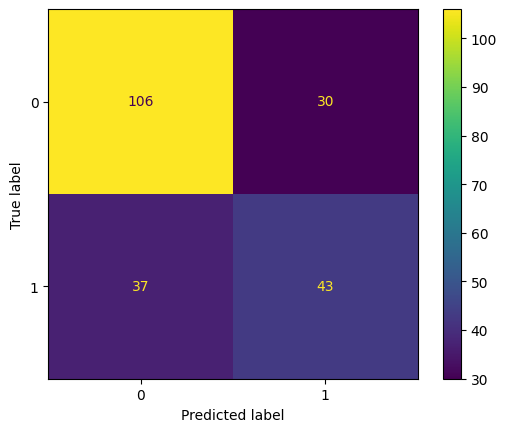

In [ ]:
cm = confusion_matrix(y_test, y_pred) # computes the confusion matrix
ConfusionMatrixDisplay(cm, clf.classes_).plot()

[[106  30]
 [ 37  43]]


<ipython-input-14-1be2711cfa9a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-14-1be2711cfa9a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


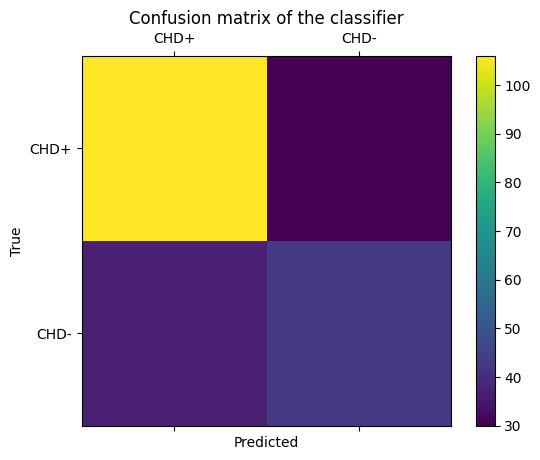

In [ ]:
labels = ['CHD+', 'CHD-']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Decision Tree Visualization

This code visualizes the trained decision tree (`clf`) as a graph for better interpretability.

- It uses `export_graphviz` from `sklearn` to generate a **DOT-format representation** of the decision tree, which is then converted to an image using the `pydotplus` library.
- The `feature_names` parameter specifies the names of the **input features**, while `class_names` specifies the **class labels** (e.g., '0' and '1' for binary classification).
- The parameters:
  - `filled=True` colors the nodes based on their classification.
  - `rounded=True` rounds the edges of the nodes for better visualization.
- The graph is saved as a PNG file (`diabetes.png`).
- `Image(graph.create_png())` renders the visualization in a Jupyter Notebook.

This visual representation helps in understanding the decision-making process of the model by showing:
- The **splits at each node**.
- The **thresholds for splitting**.
- The **importance of features** used in the model.


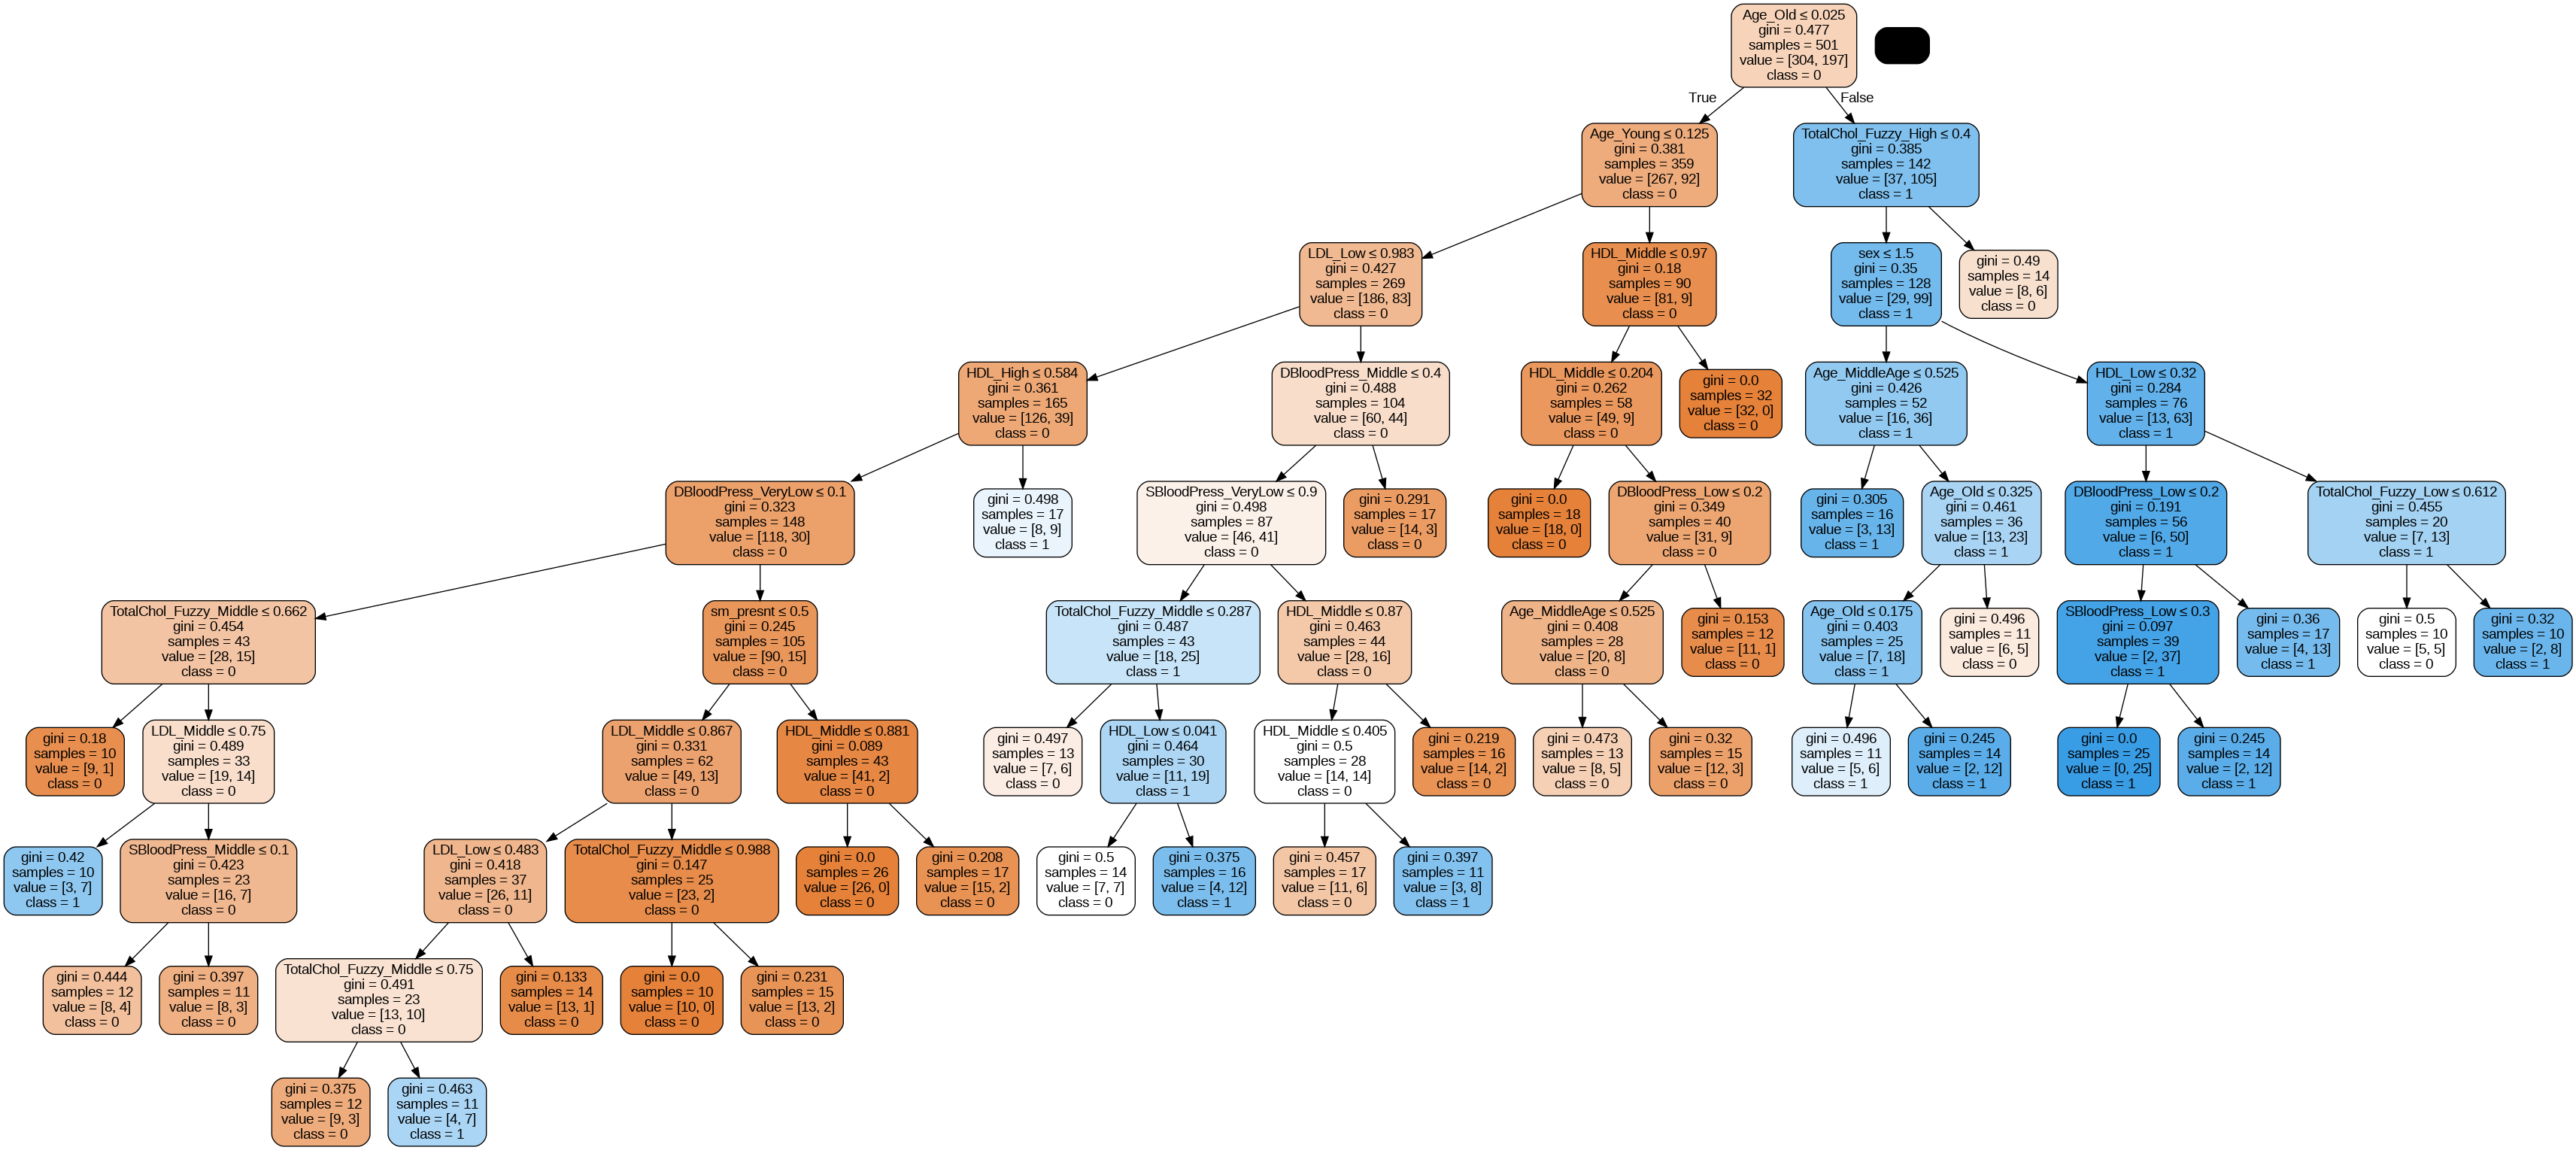

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = ['sex','sm_presnt','TotalChol_Fuzzy_Low','TotalChol_Fuzzy_Middle','TotalChol_Fuzzy_High','HDL_Low','HDL_Middle','HDL_High','LDL_Low','LDL_Middle','LDL_High','Age_Young','Age_MiddleAge','Age_Old','SBloodPress_VeryLow','SBloodPress_Low','SBloodPress_Middle','SBloodPress_High','SBloodPress_VeryHigh','DBloodPress_VeryLow','DBloodPress_Low','DBloodPress_Middle','DBloodPress_High','DBloodPress_VeryHigh'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())